In [6]:
import rasterio
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import seaborn as sns
sns.set_context('talk')

def rastersstats_to_dict(dir):

    rstr_dict = {}
    file_list = glob.glob(str(dir) + '*.tif')

    for f in file_list:

        rstr_dict[f] = {}
        src = rasterio.open(f)
        rstr_dict[f]['arr'] = src.read(1)
        rstr_dict[f]['mu'] = np.nanmean(rstr_dict[f]['arr'])
        rstr_dict[f]['sigma'] = np.nanstd(rstr_dict[f]['arr'])
        rstr_dict[f]['CV'] = rstr_dict[f]['sigma'] / rstr_dict[f]['mu']
        rstr_dict[f]['year'] = re.findall('(\d{4})', f)

    return rstr_dict

d1 = rastersstats_to_dict('../thesis/gis/raster/hv/snow_depth/corrected/kidney_lake/')
d2 = rastersstats_to_dict('../thesis/fidelity_analysis/results/kidney_lake/2015_v._2017/')
d = {**d1, **d2}
print(d.keys())

dict_keys(['../thesis/gis/raster/hv/snow_depth/corrected/kidney_lake/hv_kidney_lake_depth_2015.tif', '../thesis/gis/raster/hv/snow_depth/corrected/kidney_lake/hv_kidney_lake_depth_2017.tif', '../thesis/fidelity_analysis/results/kidney_lake/2015_v._2017/2015_v._2017_cwssim_arr.tif', '../thesis/fidelity_analysis/results/kidney_lake/2015_v._2017/2015_v._2017_gms_arr.tif', '../thesis/fidelity_analysis/results/kidney_lake/2015_v._2017/2015_v._2017_nrmse_arr.tif', '../thesis/fidelity_analysis/results/kidney_lake/2015_v._2017/2015_v._2017_ssim_arr.tif'])


In [18]:
wanted_keys = ['../thesis/gis/raster/hv/snow_depth/corrected/kidney_lake/hv_kidney_lake_depth_2015.tif',
               '../thesis/gis/raster/hv/snow_depth/corrected/kidney_lake/hv_kidney_lake_depth_2017.tif',
               '../thesis/fidelity_analysis/results/kidney_lake/2015_v._2017/2015_v._2017_nrmse_arr.tif']
dp = dict((k, d[k]) for k in wanted_keys if k in d)
dp

{'../thesis/gis/raster/hv/snow_depth/corrected/kidney_lake/hv_kidney_lake_depth_2015.tif': {'arr': array([[0.9398877 , 0.9756543 , 0.925636  , ..., 0.6414868 , 0.6137158 ,
          0.5791089 ],
         [0.9276807 , 0.9841382 , 0.917854  , ..., 0.62799805, 0.6225354 ,
          0.60788697],
         [0.88718385, 0.9673535 , 0.925636  , ..., 0.6197583 , 0.63455933,
          0.62522095],
         ...,
         [0.9732129 , 0.9777295 , 0.97867554, ..., 0.51203126, 0.50470704,
          0.50714844],
         [0.9756848 , 0.9792554 , 1.0056531 , ..., 0.47675294, 0.47837037,
          0.54636353],
         [0.9008557 , 0.9114148 , 0.90180176, ..., 0.44846314, 0.45703858,
          0.5293347 ]], dtype=float32),
  'mu': 0.7092399,
  'sigma': 0.30267727,
  'CV': 0.4267629,
  'year': ['2015']},
 '../thesis/gis/raster/hv/snow_depth/corrected/kidney_lake/hv_kidney_lake_depth_2017.tif': {'arr': array([[0.7222107 , 0.7162598 , 0.7265747 , ..., 0.5496338 , 0.556958  ,
          0.53898317],
       

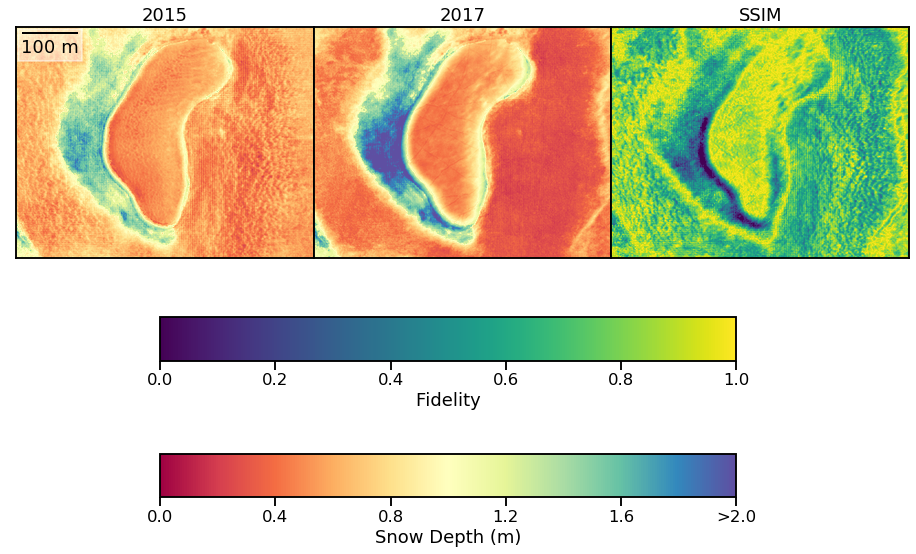

In [19]:
arrs = []
titles = ['2015', '2017', 'SSIM']
for k in dp.keys():
    arrs.append(dp[k]['arr'])

fig, axes = plt.subplots(figsize=(16, 10), nrows=1, ncols=3)

i=0

for t, a, ax in sorted(zip(titles, arrs, axes.flat), key = lambda x: x[0]):

    if t == '2015':
        im = ax.imshow(a, cmap='Spectral',
        interpolation='lanczos', vmin=0.0, vmax=2)
        scalebar = ScaleBar(1, box_alpha=0.5, location=2) # 1 pixel = 1 meter
        ax.add_artist(scalebar)

    if t == '2017':
        im = ax.imshow(a, cmap='Spectral',
        interpolation='lanczos', vmin=0.0, vmax=2)
    
    if t == "SSIM":   
        im2 = ax.imshow(a, cmap='viridis', interpolation='lanczos', vmin=0.0, vmax=1)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(t)
    
    i+=1

mp = axes[0].get_children()[-2]
mp2 = axes[-1].get_children()[-2]

cax = fig.add_axes([0.25, 0.01, 0.5, 0.06])
cbar=plt.colorbar(mappable=mp, cax=cax,
                  ticks = ([0, 0.4, 0.8, 1.2, 1.6, 2.0]),
                  orientation='horizontal')
cbar.set_label('Snow Depth (m)')
cbar.ax.set_xticklabels(['0.0', '0.4', '0.8', '1.2', '1.6', '>2.0'])


cax2 = fig.add_axes([0.25, 0.2, 0.5, 0.06])
cbar2 = plt.colorbar(mappable=mp2, cax=cax2,
                  ticks = ([0, 0.2, 0.4, 0.6, 0.8, 1.0]),
                  orientation='horizontal')
cbar2.set_label('Fidelity')
cbar2.ax.set_xticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

# plt.savefig('f18_300.png', dpi=300, bbox_inches='tight')
# plt.savefig('f18_600.png', dpi=600, bbox_inches='tight')

In [16]:
np.sum(arrs[0] < 0.3)

486

In [17]:
np.sum(arrs[1] < 0.3)

34382